<a href="https://colab.research.google.com/github/Samdatascienti/Samdatascienti/blob/main/tourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
# accessing drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Previous data used

# all tourism data (2007-2021)

In [ ]:
# 
df_7_14=pd.read_excel('/content/gdrive/MyDrive/Tourism_project/Tourism data-2007_2021.xlsx',
                 sheet_name='2007 - 2014')
df_7_14.head()

,ID,Year,Month,CountryofResidence,RegionofResidence,Border,ModeofTransport,PurposeOfVisit,NumberOfPeople
0,143408,2008,January,Algeria,Africa,KIA,Air,Business,7.0
1,143409,2008,January,Angola,Africa,KIA,Air,Business,4.0
2,143410,2008,January,Australia,East Asia / Pacific,KIA,Air,VFR,15.0
3,143411,2008,January,Australia,East Asia / Pacific,KIA,Air,Business,20.0
4,143412,2008,January,Australia,East Asia / Pacific,KIA,Air,Leisure,24.0


In [ ]:
df_15_20=pd.read_excel('/content/gdrive/MyDrive/Tourism_project/Tourism data-2007_2021.xlsx',
                 sheet_name='2015-2020')
df_15_20.head()

,Year,Month,Nationality,RoN WTO,Border,Mode,Purpose,Number
0,2015,January,Burundi,Africa,Akanyaru Bas,Road,Other,8
1,2015,January,Burundi,Africa,Akanyaru Bas,Road,Business,94
2,2015,January,Burundi,Africa,Akanyaru Bas,Road,Resident,2
3,2015,January,Burundi,Africa,Akanyaru Bas,Road,Visit,8
4,2015,January,Italy,Europe,Akanyaru Bas,Road,Holiday,2


In [ ]:
df_7_14.shape

(71839, 9)

In [ ]:
df_15_20.shape

(244057, 8)

In [ ]:
df=pd.read_excel('/content/gdrive/MyDrive/Tourism_project/Tourism_demand_data.xlsx')
df.head()

,Year,Month,Nationality,RoN WTO,RoN NISR,Border,ModeofTransport,PurposeOfVisit,NumberOfPeople
0,2008,January,Algeria,Africa,NaN,KIA,Air,Business,7
1,2008,January,Angola,Africa,NaN,KIA,Air,Business,4
2,2008,January,Australia,East Asia / Pacific,NaN,KIA,Air,VFR,15
3,2008,January,Australia,East Asia / Pacific,NaN,KIA,Air,Business,20
4,2008,January,Australia,East Asia / Pacific,NaN,KIA,Air,Leisure,24


In [ ]:
df.tail()

,Year,Month,Nationality,RoN WTO,RoN NISR,Border,ModeofTransport,PurposeOfVisit,NumberOfPeople
330105,2021,August,Kenya,Africa,EAC,Rusumo,Road,Resident,14
330106,2021,August,United States of America,Americas,North America,Rusumo,Road,Resident,4
330107,2021,August,Oman,Middle East,Asia,Rusumo,Road,Resident,2
330108,2021,August,Germany,Europe,Europe,Rusumo,Road,Resident,1
330109,2021,August,Zimbabwe,Africa,Rest of Africa,Rusumo,Road,Resident,1


In [ ]:
df.shape

(258570, 9)

In [ ]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330110 entries, 0 to 330109
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Year             330110 non-null  int64 
 1   Month            330110 non-null  object
 2   Nationality      330110 non-null  object
 3   RoN WTO          330110 non-null  object
 4   RoN NISR         258271 non-null  object
 5   Border           330110 non-null  object
 6   ModeofTransport  330110 non-null  object
 7   PurposeOfVisit   330110 non-null  object
 8   NumberOfPeople   330034 non-null  object
dtypes: int64(1), object(8)
memory usage: 22.7+ MB


# Groupby

In [ ]:
# transforming Number of people from object to numeric
df['NumberOfPeople'] = pd.to_numeric(df['NumberOfPeople'], errors='coerce')

In [ ]:
df['NumberOfPeople'].isnull().sum()

83

In [ ]:
# grouping total_amount by year, month, week, drugs, and districts
df_grouped= df.groupby(['Year','Month','Nationality','RoN WTO',
                        'Border','ModeofTransport',	'PurposeOfVisit']).agg(date=('Year','first'),
                                                              number=('NumberOfPeople',np.sum)
                                                              ).reset_index().sort_values('date')

In [ ]:
df_grouped.head()

,Year,Month,Nationality,RoN WTO,Border,ModeofTransport,PurposeOfVisit,date,number
0,2007,April,Afghanistan,South Asia,KIA,Air,Other,2007,1.0
4616,2007,March,Sierra Leone,Africa,Land Border,Road,Other,2007,2.0
4615,2007,March,Sierra Leone,Africa,KIA,Air,Other,2007,3.0
4614,2007,March,Seychelles,Africa,KIA,Air,Other,2007,2.0
4613,2007,March,Serbia,Europe,KIA,Air,Other,2007,5.0


In [ ]:
print('lenght of full dataframe: ', df.shape[0])
print('lenght of grouped dataframe: ', df_grouped.shape[0])

print('difference of full dataframe to grouped dataframe: ',df.shape[0]-df_grouped.shape[0])

lenght of full dataframe:  330110
lenght of grouped dataframe:  264655
difference of full dataframe to grouped dataframe:  65455


In [ ]:
tourism_data=df_grouped[['Year','Month','Nationality','RoN WTO','Border','ModeofTransport','PurposeOfVisit',
                         'number']]
tourism_data.head()

,Year,Month,Nationality,RoN WTO,Border,ModeofTransport,PurposeOfVisit,number
0,2007,April,Afghanistan,South Asia,KIA,Air,Other,1.0
4616,2007,March,Sierra Leone,Africa,Land Border,Road,Other,2.0
4615,2007,March,Sierra Leone,Africa,KIA,Air,Other,3.0
4614,2007,March,Seychelles,Africa,KIA,Air,Other,2.0
4613,2007,March,Serbia,Europe,KIA,Air,Other,5.0


In [ ]:
tourism_data['Year'] = tourism_data['Year'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tourism_data['date'] = tourism_data['Month'] + '-' + tourism_data['Year']
tourism_data.head()

,Year,Month,Nationality,RoN WTO,Border,ModeofTransport,PurposeOfVisit,number,date
0,2007,April,Afghanistan,South Asia,KIA,Air,Other,1.0,April-2007
4616,2007,March,Sierra Leone,Africa,Land Border,Road,Other,2.0,March-2007
4615,2007,March,Sierra Leone,Africa,KIA,Air,Other,3.0,March-2007
4614,2007,March,Seychelles,Africa,KIA,Air,Other,2.0,March-2007
4613,2007,March,Serbia,Europe,KIA,Air,Other,5.0,March-2007


In [ ]:
tourism_data['date']=pd.to_datetime(tourism_data['date'])


In [ ]:
tourism_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264655 entries, 0 to 264654
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Year             264655 non-null  object        
 1   Month            264655 non-null  object        
 2   Nationality      264655 non-null  object        
 3   RoN WTO          264655 non-null  object        
 4   Border           264655 non-null  object        
 5   ModeofTransport  264655 non-null  object        
 6   PurposeOfVisit   264655 non-null  object        
 7   number           264655 non-null  float64       
 8   date             264655 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 20.2+ MB


# Descriptive statistics

In [ ]:
tourism_data['number'] = tourism_data['number'].astype(int)

By country

In [ ]:
#different aggregate functions
table = pd.pivot_table(tourism_data,index=['Nationality'],aggfunc={'number':np.sum}).sort_values('number', ascending = False)
table

,number
Nationality,
Democratic Republic of Congo,22549892
Rwanda,17964785
Uganda,3888020
Burundi,2720098
Tanzania,1354864
...,...
Cape Verde,1
Sri lanka,1
Stateless (1954 convention),1


By Region

In [ ]:
# top 20 countries to visit Rwanda
table.head(20)

,number
Nationality,
Democratic Republic of Congo,22549892
Rwanda,17964785
Uganda,3888020
Burundi,2720098
Tanzania,1354864
Kenya,1037208
Burundi,723320
United States of America,615842
India,332182


In [ ]:
#different aggregate functions
table = pd.pivot_table(tourism_data,index=['RoN WTO'],aggfunc={'number':np.sum}).sort_values('number', ascending = False)
table

,number
RoN WTO,
Africa,51102337
Europe,1441234
Americas,856641
South Asia,560226
East Asia / Pacific,309057
Middle East,80726
UN,33191
Unspecified,189
Asia,7


In [ ]:
# #different aggregate functions
# table = pd.pivot_table(tourism_data,index=['RoN NISR'],aggfunc={'number':np.sum}).sort_values('number', ascending = False)
# table

By mode of transport

In [ ]:
#different aggregate functions
table = pd.pivot_table(tourism_data,index=['ModeofTransport'],aggfunc={'number':np.sum}).sort_values('number', ascending = False)
table

,number
ModeofTransport,
Road,49836716
Air,4546892


By boarder

In [ ]:
tourism_data['Border'].value_counts()

KIA              106478
Corniche          29385
Land Border       24287
Gatuna            17990
Rusizi I          16548
Cyanika           11394
Rusumo             8432
Akanyaru Haut      8356
Nemba              8172
Ruhwa              5813
Bugarama           5472
Land border        5384
Kagitumba          4533
Poids Lourds       4091
Rusizi II          3178
Land Borders       3162
Buziba              790
La Corniche         543
Akanyaru Bas        204
Nshili              187
Akanyaru haut       163
kagitumba            64
Kagiumba             19
Akanyaru bas          9
Akanyaru Bas          1
Name: Border, dtype: int64

In [ ]:
tourism_data['Border'].isnull().sum()

0

In [ ]:
#different aggregate functions
table = pd.pivot_table(tourism_data,index=['Border'],aggfunc={'number':np.sum}).sort_values('number', ascending = False)
table

,number
Border,
Poids Lourds,7853950
Rusizi I,7454921
Bugarama,5004242
Rusizi II,4582094
Gatuna,4558444
KIA,4546892
Land Border,4489880
Corniche,4191620
Cyanika,2858402


Graphs

By year and month

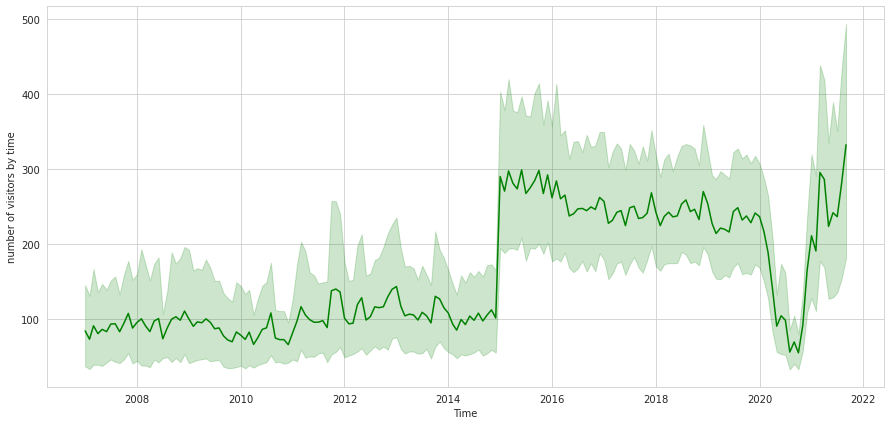

In [ ]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.lineplot(x = 'date', y = 'number', data = tourism_data, color='green')
plt.xlabel('Time')
plt.ylabel('number of visitors by time')
display()

In [ ]:
# label points on the plot
for x, y in zip(tourism_data['date'], tourism_data['number']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    plt.text(x = x, # x-coordinate position of data label
    y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
    s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
    color = 'purple') # set colour of line

In [ ]:
tourism_data['Month'] = pd.DatetimeIndex(tourism_data['date']).month
tourism_data['Month'] = pd.to_datetime(tourism_data['Month'], format='%m').dt.month_name().str.slice(stop=3)
tourism_data.head()

,Year,Month,Nationality,RoN WTO,Border,ModeofTransport,PurposeOfVisit,number,date
0,2007,Apr,Afghanistan,South Asia,KIA,Air,Other,1,2007-04-01
4616,2007,Mar,Sierra Leone,Africa,Land Border,Road,Other,2,2007-03-01
4615,2007,Mar,Sierra Leone,Africa,KIA,Air,Other,3,2007-03-01
4614,2007,Mar,Seychelles,Africa,KIA,Air,Other,2,2007-03-01
4613,2007,Mar,Serbia,Europe,KIA,Air,Other,5,2007-03-01


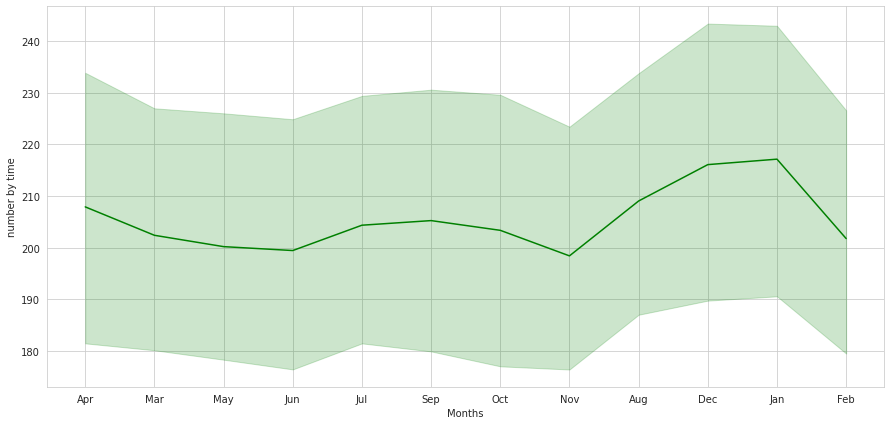

In [ ]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.lineplot(x = 'Month', y = 'number', data = tourism_data, color='green')
plt.xlabel('Months')
plt.ylabel('number by time')
display()


By purpose of visit

In [ ]:
#different aggregate functions
table = pd.pivot_table(tourism_data,index=['PurposeOfVisit'],aggfunc={'number':np.sum}).sort_values('number', ascending = False)
table

,number
PurposeOfVisit,
Resident,19328102
Business,10942858
Transit,10663668
Visit,6012358
Other,2215276
VFR,2117171
Holiday,1069944
Leisure,598353
Education,551158


Saving dataframe as a csv in drive

In [ ]:
tourism_data.to_csv('/content/gdrive/MyDrive/Tourism_project/tourismdata.csv')

In [ ]:
tourism_data.head()

,Year,Month,Nationality,RoN WTO,Border,ModeofTransport,PurposeOfVisit,number,date
0,2007,Apr,Afghanistan,South Asia,KIA,Air,Other,1,2007-04-01
4616,2007,Mar,Sierra Leone,Africa,Land Border,Road,Other,2,2007-03-01
4615,2007,Mar,Sierra Leone,Africa,KIA,Air,Other,3,2007-03-01
4614,2007,Mar,Seychelles,Africa,KIA,Air,Other,2,2007-03-01
4613,2007,Mar,Serbia,Europe,KIA,Air,Other,5,2007-03-01


# Modeling

In [ ]:
#Add a trend component to our timeseres with drugs added
tourism_data['trend']= range(tourism_data.shape[0])
# change month column to category for onehot encoding process
tourism_data['Year']=tourism_data['Year'].astype('category')
tourism_data['Month']=tourism_data['Month'].astype('category')
tourism_data['RoN WTO']=tourism_data['Month'].astype('category')
tourism_data['PurposeOfVisit']=tourism_data['PurposeOfVisit'].astype('category')
tourism_data['ModeofTransport']=tourism_data['ModeofTransport'].astype('category')
# time_series_dd['time']=time_series_dd['time'].astype('datetime64[ns]')
# dropping columns not required in model
X= tourism_data.drop(['date','Nationality','Border','number'],axis=1)
# dummies and their columns names
names= pd.get_dummies(X).columns
X=pd.get_dummies(X).values
# dependent variable
y= tourism_data.number.values
# sc = StandardScaler()
# y=np.log(y)
# y=y.reshape(-1,1)
# # y=sc.fit_transform(y)
# # sklearn.preprocessing.MinMaxScaler
# scaler = MinMaxScaler()
# y=scaler.fit_transform(y)

In [ ]:
X.shape

(264655, 54)

In [ ]:
# as usual, let us load all the necessary libraries
import numpy as np  # numerical computation with arrays
import pandas as pd # library to manipulate datasets using dataframes
import scipy as sp  # statistical library
from google.colab import files

# below sklearn libraries for different models
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# linear regression
model = LinearRegression()
model.fit(X,y)
model.get_params()
model.coef_
# Prediction by model  train
prediction= model.predict(X)

from sklearn.metrics import mean_squared_error
mse_train_d=np.sqrt(mean_squared_error(y,prediction))
print('Mean square error train: ',mse_train_d)
r_score_train=r2_score(y,prediction)
# r_score_test=r2_score(y_test,pred_test)
print('r score of train {}'.format(r_score_train))

# # test Prediction by model
# pred_test= model.predict(X_test)
# mse_test=np.sqrt(mean_squared_error(y_test,pred_test))
# print('Mean square error test: ', mse_test)
# diff=mse_train_d-mse_test
# print('Mean square error difference between train and test: ', diff)


Mean square error train:  1886.8674328779668
r score of train 0.008956433602157143


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(n_estimators=25000,max_depth=15, max_features=12, min_samples_leaf=8,random_state=0)
regr.fit(X, y)
y_pred1 = regr.predict(X)
# y_pred2 = regr.predict(X_test)

MSE_train= np.sqrt(mean_squared_error(y,y_pred1))
# MSE_test= np.sqrt(mean_squared_error(y_test,y_pred2))
print('mean square error of train {}'.format(MSE_train))
# print('mean square error of test {}'.format(MSE_test))
r_score_train=r2_score(y,y_pred1)
# r_score_test=r2_score(y_test,y_pred2)
print('r score of train {}'.format(r_score_train))
# print('r score of test{}'.format(r_score_test))

# Second project Parks

In [ ]:
df_par=pd.read_excel('/content/gdrive/MyDrive/Tourism_project/Visits to National Park by type of client_Clean.xlsx',
                     sheet_name='Combined database')
df_par.head()

,Park,Year,Month,Type of clinent,Number of clients
0,Volcanoes,2021,January,Rwandan Resident,44.0
1,Volcanoes,2021,February,Rwandan Resident,8.0
2,Volcanoes,2021,March,Rwandan Resident,16.0
3,Volcanoes,2021,April,Rwandan Resident,10.0
4,Volcanoes,2021,May,Rwandan Resident,20.0


In [ ]:
df_par['Type of clinent '] 

0       Rwandan Resident 
1       Rwandan Resident 
2       Rwandan Resident 
3       Rwandan Resident 
4       Rwandan Resident 
              ...        
1867      Foreign Visitor
1868      Foreign Visitor
1869      Foreign Visitor
1870      Foreign Visitor
1871      Foreign Visitor
Name: Type of clinent , Length: 1872, dtype: object

data cleaning

In [ ]:
df_par.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Park               1872 non-null   object 
 1   Year               1872 non-null   int64  
 2   Month              1872 non-null   object 
 3   Type of clinent    1872 non-null   object 
 4   Number of clients  1838 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 73.2+ KB


In [ ]:
# groupby
# grouping total_amount by year, month, week, drugs, and districts
df_grouped= df_par.groupby(['Year','Month ','Park ','Type of clinent ']).agg(date=('Year','first'),
                                                              number=('Number of clients',np.sum)
                                                              ).reset_index().sort_values('date')

In [ ]:
df_grouped

,Year,Month,Park,Type of clinent,date,number
0,2009,April,Akagera,Foreign Resident,2009,261.0
78,2009,May,Volcanoes,Foreign Resident,2009,192.0
77,2009,May,Nyungwe,Rwandan Resident,2009,16.0
76,2009,May,Nyungwe,Foreign Visitor,2009,213.0
75,2009,May,Nyungwe,Foreign Resident,2009,62.0
...,...,...,...,...,...,...
1325,2021,February,Akagera,Rwandan Resident,2021,178.0
1324,2021,February,Akagera,Foreign Visitor,2021,197.0
1322,2021,December,Volcanoes,Rwandan Resident,2021,0.0
1334,2021,January,Akagera,Rwandan Resident,2021,427.0


In [ ]:
tours_data=df_grouped
tours_data['Year'] = tours_data['Year'].astype(str)
tours_data['date'] = tours_data['Month '] + '-' + tours_data['Year']
tours_data.head()

,Year,Month,Park,Type of clinent,date,number
0,2009,April,Akagera,Foreign Resident,April-2009,261.0
78,2009,May,Volcanoes,Foreign Resident,May-2009,192.0
77,2009,May,Nyungwe,Rwandan Resident,May-2009,16.0
76,2009,May,Nyungwe,Foreign Visitor,May-2009,213.0
75,2009,May,Nyungwe,Foreign Resident,May-2009,62.0


In [ ]:
# transforming date from string to date format
tours_data['date']=pd.to_datetime(tours_data['date'])
# transforming date from float to integer
tours_data['number'] = tours_data['number'].astype(int)
tours_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1404 entries, 0 to 1403
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Year              1404 non-null   object        
 1   Month             1404 non-null   object        
 2   Park              1404 non-null   object        
 3   Type of clinent   1404 non-null   object        
 4   date              1404 non-null   datetime64[ns]
 5   number            1404 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 76.8+ KB


Graphs

In [ ]:
tours_data['number'] = tours_data['number'].astype(int)

Descriptive statistics

In [ ]:
#different aggregate by Park
table = pd.pivot_table(tours_data,index=['Park '],aggfunc={'number':np.sum}).sort_values('number', ascending = False)
table

,number
Park,
Volcanoes,615334
Akagera,407349
Nyungwe,123438


In [ ]:
#different aggregate by Month
table = pd.pivot_table(tours_data,index=['Month '],aggfunc={'number':np.sum}).sort_values('number', ascending = False)
table

,number
Month,
July,141296
August,138665
June,110211
September,105387
January,96950
December,96893
February,93645
October,93232
March,79215


In [ ]:
#different aggregate by type of visitor
table = pd.pivot_table(tours_data,index=['Type of clinent '],aggfunc={'number':np.sum}).sort_values('number', ascending = False)
table

,number
Type of clinent,
Foreign Visitor,776321
Rwandan Resident,268346
Foreign Resident,101454


visualizations

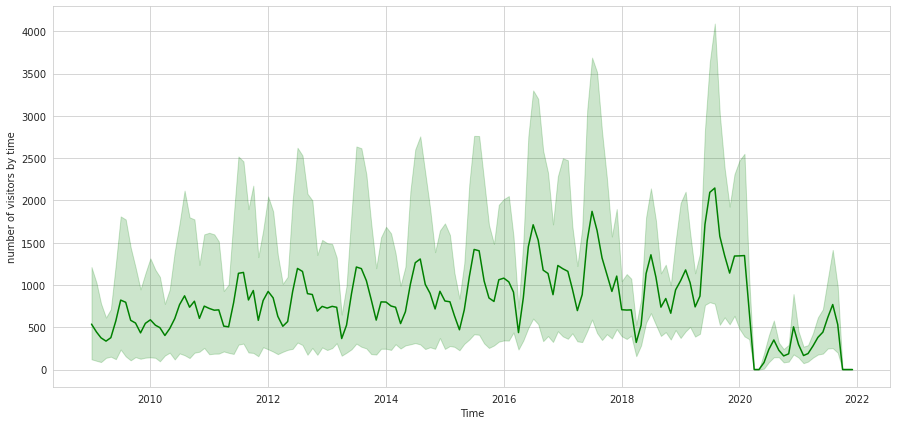

In [ ]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.lineplot(x = 'date', y = 'number', data = tours_data, color='green')
plt.xlabel('Time')
plt.ylabel('number of visitors by time')
display()

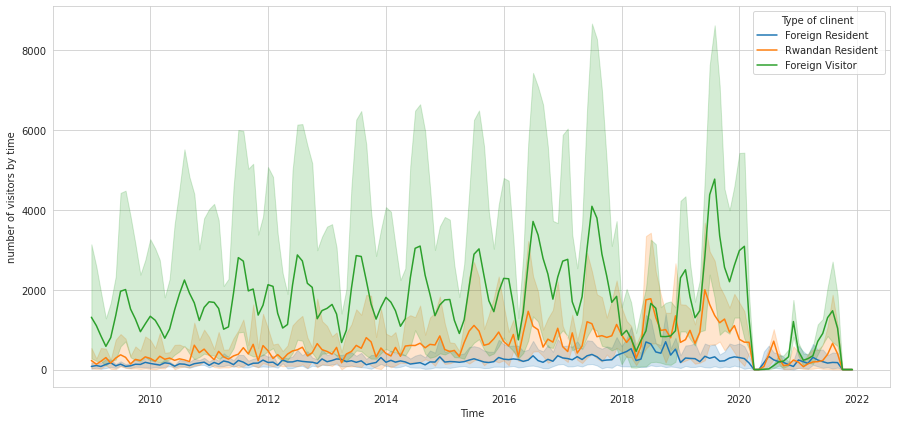

In [ ]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.lineplot(x = 'date', y = 'number', hue='Type of clinent ',data = tours_data, color='green')
plt.xlabel('Time')
plt.ylabel('number of visitors by time')
display()

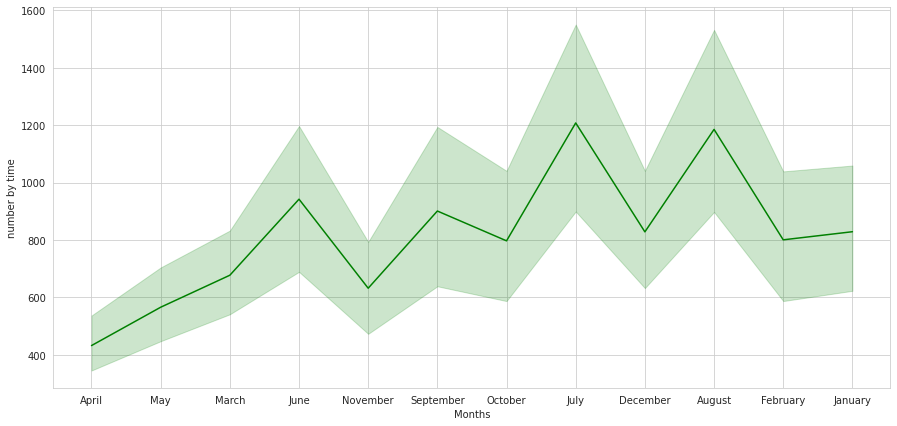

In [ ]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.lineplot(x = 'Month ', y = 'number', data = tours_data, color='green')
plt.xlabel('Months')
plt.ylabel('number by time')
display()


# visit to the national parks with products

In [5]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [6]:
# accessing drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [27]:
df_pro=pd.read_excel('/content/gdrive/MyDrive/Tourism_project/Visits to National Parks _Clean data.xlsx')
df_pro.head()

,Park,Year,Month,Product,Number of visitors
0,Akagera,2021,January,Game Safari,1050.0
1,Akagera,2021,January,Camping,173.0
2,Akagera,2021,January,Boat ride,155.0
3,Akagera,2021,January,Behind Scene,2.0
4,Akagera,2021,January,Fishing & Other,13.0


In [28]:
# groupby
# grouping total_amount by year, month, week, drugs, and districts
df_grouped= df_pro.groupby(['Year','Month ','Park ','Product']).agg(date=('Year','first'),
                                                              number=('Number of visitors ',np.sum)
                                                              ).reset_index().sort_values('date')

In [29]:
df_grouped

,Year,Month,Park,Product,date,number
0,2009,April,Akagera,Behind Scene,2009,0.0
122,2009,March,Volcanoes,Dian Fossey's Tomb,2009,16.0
123,2009,March,Volcanoes,Golden Monkey,2009,32.0
124,2009,March,Volcanoes,Gorillas,2009,915.0
125,2009,March,Volcanoes,Mountain climbing,2009,44.0
...,...,...,...,...,...,...
2341,2021,January,Akagera,Camping,2021,173.0
2342,2021,January,Akagera,Fishing & Other,2021,13.0
2343,2021,January,Akagera,Game Safari,2021,1050.0
2323,2021,February,Akagera,Behind Scene,2021,2.0


In [30]:
tours_data=df_grouped
tours_data['Year'] = tours_data['Year'].astype(str)
tours_data['date'] = tours_data['Month '] + '-' + tours_data['Year']
tours_data.head()

,Year,Month,Park,Product,date,number
0,2009,April,Akagera,Behind Scene,April-2009,0.0
122,2009,March,Volcanoes,Dian Fossey's Tomb,March-2009,16.0
123,2009,March,Volcanoes,Golden Monkey,March-2009,32.0
124,2009,March,Volcanoes,Gorillas,March-2009,915.0
125,2009,March,Volcanoes,Mountain climbing,March-2009,44.0


In [31]:
# replacing written error in september 2021
tours_data.replace(to_replace = "Septepmber-2021", value ="September-2021", inplace=True)

In [32]:
# transforming date from string to date format
tours_data['date']=pd.to_datetime(tours_data['date'])
# transforming date from float to integer
tours_data['number'] = tours_data['number'].astype(int)
tours_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2457 entries, 0 to 2456
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Year     2457 non-null   object        
 1   Month    2457 non-null   object        
 2   Park     2457 non-null   object        
 3   Product  2457 non-null   object        
 4   date     2457 non-null   datetime64[ns]
 5   number   2457 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 134.4+ KB


In [33]:
# Time Range 
tours_data["date"].min(), tours_data["date"].max(), tours_data["number"].min(), tours_data["number"].max()

(Timestamp('2009-01-01 00:00:00'), Timestamp('2021-12-01 00:00:00'), 0, 6474)

In [34]:
# Dataframe must be sorted by date because of Time Series Split 
df = tours_data.sort_values("date")

# to split test and train 
train = df.loc[(df["date"] < "2021-01-01"), :]
test = df.loc[(df["date"] >= "2021-01-01"), :]
train.shape, test.shape

((2280, 6), (177, 6))

Descriptive statistics

In [15]:
#different aggregate by Park
table = pd.pivot_table(tours_data,index=['Park '],aggfunc={'number':np.sum}).sort_values('number', ascending = False)
table

,number
Park,
Akagera,405124
Volcanoes,328737
Nyungwe,123603


In [16]:
#different aggregate by Month
table = pd.pivot_table(tours_data,index=['Month '],aggfunc={'number':np.sum}).sort_values('number', ascending = False)
table

,number
Month,
July,107141
August,104220
June,83020
December,75204
September,72950
January,72395
February,68166
October,67025
November,56574


In [17]:
#different aggregate by Park
table = pd.pivot_table(tours_data,index=['Product'],aggfunc={'number':np.sum}).sort_values('number', ascending = False)
table

,number
Product,
Game Safari,359098
Gorillas,223063
Golden Monkey,51022
Canopy,49786
Primates,34492
Trails,32917
Mountain climbing,32579
Camping,25930
Boat ride,21446


Visualizations

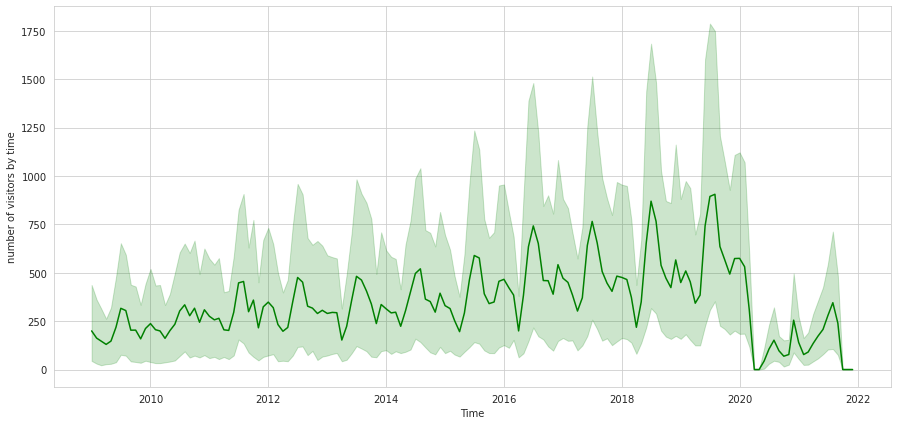

In [30]:
#Let's have a look at number of visitors by date
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.lineplot(x = 'date', y = 'number', data = tours_data, color='green')
plt.xlabel('Time')
plt.ylabel('number of visitors by time')
display()

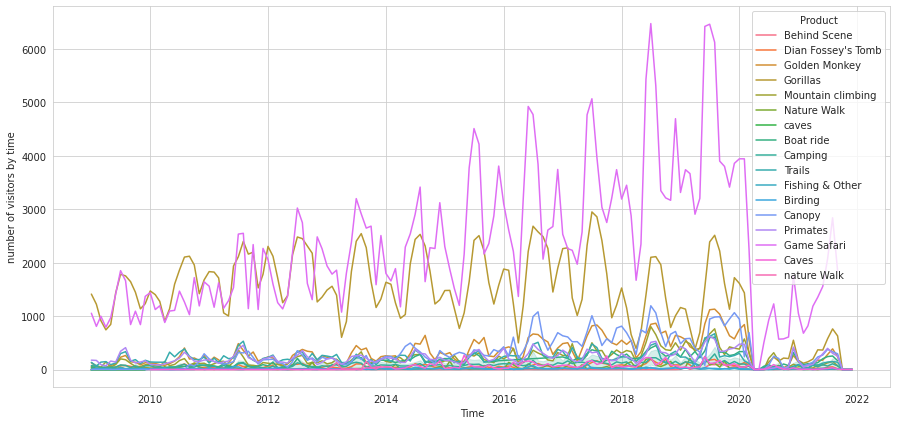

In [ ]:
#Let's have a look at number of visitors by product
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.lineplot(x = 'date', y = 'number', hue='Product',data = tours_data, color='green')
plt.xlabel('Time')
plt.ylabel('number of visitors by time')
display()

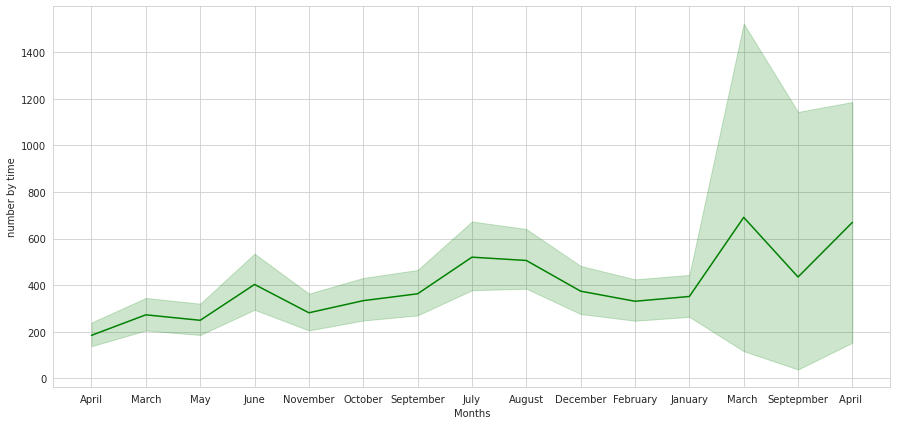

In [ ]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.lineplot(x = 'Month ', y = 'number', data = tours_data, color='green')
plt.xlabel('Months')
plt.ylabel('number by time')
display()


In [ ]:
tours_data.head()

,Year,Month,Park,Product,date,number,trend,Month
0,2009,April,Akagera,Behind Scene,2009-04-01,0,0,April
122,2009,March,Volcanoes,Dian Fossey's Tomb,2009-03-01,16,1,March
123,2009,March,Volcanoes,Golden Monkey,2009-03-01,32,2,March
124,2009,March,Volcanoes,Gorillas,2009-03-01,915,3,March
125,2009,March,Volcanoes,Mountain climbing,2009-03-01,44,4,March


# Model for product *data*

# Train

In [35]:
#Add a trend component to our timeseres with drugs added
train['trend']= range(train.shape[0])
# change month column to category for onehot encoding process
# train['Year']=train['Year'].astype('category')
train['Month ']=train['Month '].astype('category')
train['Park ']=train['Park '].astype('category')
train['Product']=train['Product'].astype('category')
# dropping columns not required in model
X= train.drop(['date','number','Year'],axis=1)
# dummies and their columns names
names= pd.get_dummies(X).columns
X=pd.get_dummies(X).values
# dependent variable
y= train.number.values

# y=np.log(y)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

# Test

In [36]:
#Add a trend component to our timeseres with drugs added
test['trend']= range(test.shape[0])
# change month column to category for onehot encoding process
# test['Year']=test['Year'].astype('category')
test['Month ']=test['Month '].astype('category')
test['Park ']=test['Park '].astype('category')
test['Product']=test['Product'].astype('category')
# dropping columns not required in model
X_test= test.drop(['date','number','Year'],axis=1)
# dummies and their columns names
names_test= pd.get_dummies(X_test).columns
X_test=pd.get_dummies(X_test).values
# dependent variable
y_test= test.number.values

# y=np.log(y)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [37]:
X.shape

(2280, 34)

In [38]:
X_test.shape

(177, 34)

In [39]:

names

Index(['trend', 'Month _April', 'Month _August', 'Month _December',
       'Month _February', 'Month _January', 'Month _July', 'Month _June',
       'Month _March', 'Month _March ', 'Month _May', 'Month _November',
       'Month _October', 'Month _September', 'Park _Akagera', 'Park _Nyungwe',
       'Park _Volcanoes', 'Product_Behind Scene', 'Product_Birding',
       'Product_Boat ride', 'Product_Camping', 'Product_Canopy',
       'Product_Caves', 'Product_Dian Fossey's Tomb',
       'Product_Fishing & Other ', 'Product_Game Safari',
       'Product_Golden Monkey', 'Product_Gorillas',
       'Product_Mountain climbing', 'Product_Nature Walk', 'Product_Primates',
       'Product_Trails', 'Product_caves', 'Product_nature Walk'],
      dtype='object')

In [40]:
names_test

Index(['trend', 'Month _April', 'Month _April ', 'Month _August',
       'Month _December', 'Month _February', 'Month _January', 'Month _July',
       'Month _June', 'Month _March', 'Month _March ', 'Month _May',
       'Month _November', 'Month _October', 'Month _September',
       'Month _Septepmber', 'Park _Akagera', 'Park _Nyungwe',
       'Park _Volcanoes', 'Product_Behind Scene', 'Product_Birding',
       'Product_Boat ride', 'Product_Camping', 'Product_Canopy',
       'Product_Caves', 'Product_Dian Fossey's Tomb',
       'Product_Fishing & Other ', 'Product_Game Safari',
       'Product_Golden Monkey', 'Product_Gorillas',
       'Product_Mountain climbing', 'Product_Nature Walk', 'Product_Primates',
       'Product_Trails'],
      dtype='object')

In [25]:
names_test= pd.get_dummies(X_test).columns

Index(['trend', 'Month _April', 'Month _April ', 'Month _August',
       'Month _December', 'Month _February', 'Month _January', 'Month _July',
       'Month _June', 'Month _March', 'Month _March ', 'Month _May',
       'Month _November', 'Month _October', 'Month _September',
       'Month _Septepmber', 'Park _Akagera', 'Park _Nyungwe',
       'Park _Volcanoes', 'Product_Behind Scene', 'Product_Birding',
       'Product_Boat ride', 'Product_Camping', 'Product_Canopy',
       'Product_Caves', 'Product_Dian Fossey's Tomb',
       'Product_Fishing & Other ', 'Product_Game Safari',
       'Product_Golden Monkey', 'Product_Gorillas',
       'Product_Mountain climbing', 'Product_Nature Walk', 'Product_Primates',
       'Product_Trails', 'Month_April', 'Month_April ', 'Month_August',
       'Month_December', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_March ', 'Month_May',
       'Month_November', 'Month_October', 'Month_September',
       'Mont

Libraries

In [41]:
# as usual, let us load all the necessary libraries
import numpy as np  # numerical computation with arrays
import pandas as pd # library to manipulate datasets using dataframes
import scipy as sp  # statistical library
from google.colab import files

# below sklearn libraries for different models
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

Linear regression

In [ ]:
# linear regression
model = LinearRegression()
model.fit(X,y)
model.get_params()
model.coef_
# Prediction by model  train
prediction= model.predict(X)

from sklearn.metrics import mean_squared_error
mse_train_d=np.sqrt(mean_squared_error(y,prediction))
print('Mean square error train: ',mse_train_d)
r_score_train=r2_score(y,prediction)
# r_score_test=r2_score(y_test,pred_test)
print('r score of train {}'.format(r_score_train))

# # test Prediction by model
# pred_test= model.predict(X_test)
# mse_test=np.sqrt(mean_squared_error(y_test,pred_test))
# print('Mean square error test: ', mse_test)
# diff=mse_train_d-mse_test
# print('Mean square error difference between train and test: ', diff)


Mean square error train:  358.1889630323571
r score of train 0.7577809166826683


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(n_estimators=15000,max_depth=15, max_features=12, min_samples_leaf=8,random_state=0)
regr.fit(X, y)
y_pred1 = regr.predict(X)
# y_pred2 = regr.predict(X_test)

MSE_train= np.sqrt(mean_squared_error(y,y_pred1))
# MSE_test= np.sqrt(mean_squared_error(y_test,y_pred2))
print('mean square error of train {}'.format(MSE_train))
# print('mean square error of test {}'.format(MSE_test))
r_score_train=r2_score(y,y_pred1)
# r_score_test=r2_score(y_test,y_pred2)
print('r score of train {}'.format(r_score_train))
# print('r score of test{}'.format(r_score_test))

mean square error of train 296.0134133485317
r score of train 0.8345728687635003
